Using the lending data from 2007-2010, found [here](https://www.lendingclub.com/info/download-data.action), trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Get the Data

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

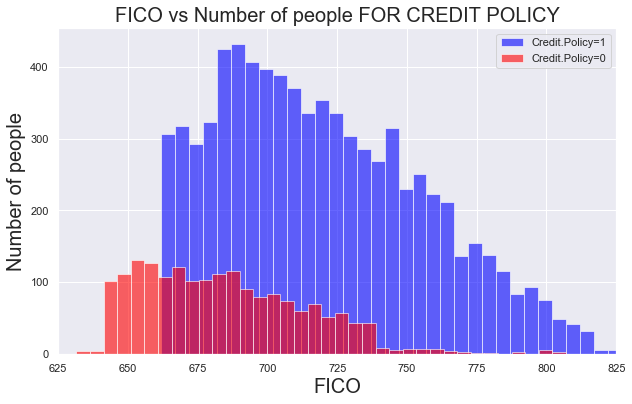

In [6]:
# Set is for style
sns.set()

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.6,color='blue',bins=40,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.6,color='red',bins=40,label='Credit.Policy=0')

plt.xlabel('FICO', size = 20)
plt.ylabel('Number of people', size = 20)
ls=[]
ls.extend(range(625, 826, 25))
plt.xticks(ticks = ls)
plt.xlim((625, 825))
plt.title('FICO vs Number of people FOR CREDIT POLICY', size = 20)
plt.legend()

* Credit.Policy=1 has more people. 
* Cutoff FICO score at around 660, below which the loan is not given. 

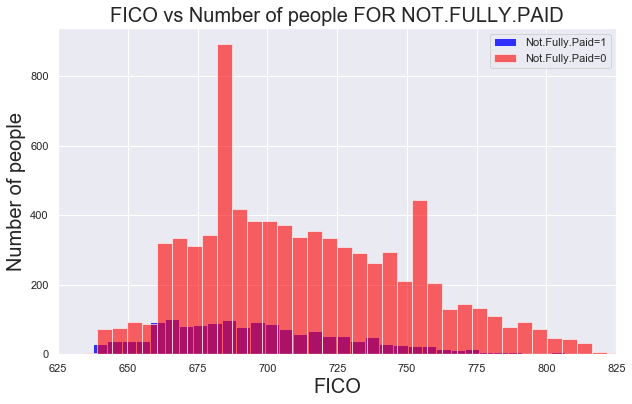

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.8,color='blue',bins=40,label='Not.Fully.Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.6,color='red',bins=40,label='Not.Fully.Paid=0')

plt.xlabel('FICO', size = 20)
plt.ylabel('Number of people', size = 20)
plt.title('FICO vs Number of people FOR NOT.FULLY.PAID', size = 20)

ls=[]
ls.extend(range(625, 826, 25))
plt.xticks(ticks = ls)
plt.xlim((625, 825))

plt.legend()

* The majority of people are fully paying out their loans.

Text(0.5, 1.0, 'Purpose vs Number of people; FullyPaid vs Not')

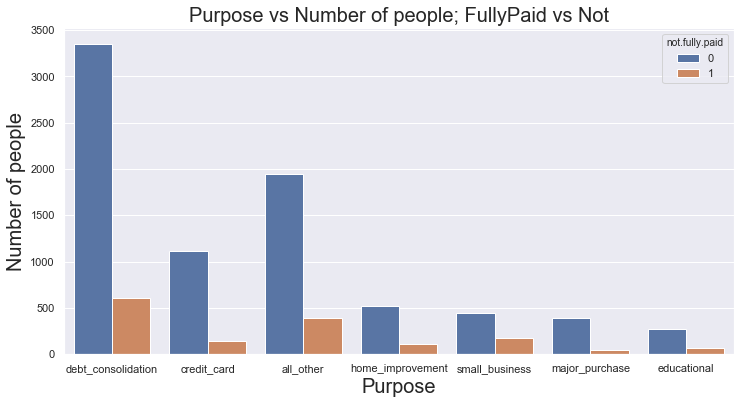

In [8]:
plt.figure(figsize = (12,6))
sns.countplot(x='purpose', hue = 'not.fully.paid', data = loans)
plt.xlabel('Purpose', size = 20)
plt.ylabel('Number of people', size = 20)
plt.title('Purpose vs Number of people; FullyPaid vs Not', size = 20)

* debt_consolidation is the most common reason to take a loan.

** The ratio between fully paid and NOT fully paid for each reason.**

In [9]:
# To show warnings only once
import warnings
warnings.filterwarnings(action='once')

In [10]:
# Function to calculate ratios of 'not.fully.paid==0' VS 'not.fully.paid==1'
def ratios():
    ls=list()
    for i in loans['purpose'].unique():
        a = (i + " " +  str(loans[loans['purpose']== i][loans['not.fully.paid']==1]['purpose'].count() / 
loans[loans['purpose']==i][loans['not.fully.paid']==0]['purpose'].count()))
        ls.append(a.split())
    return ls

In [41]:
ls = pd.DataFrame(ratios())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [12]:
ls[[1]] = ls[[1]].apply(pd.to_numeric)
ls = ls.sort_values(by = 1,ascending=False)

In [13]:
# Function for labeling barplots
def labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height, '{:.2f}'.format(height), ha="center", size=15) 

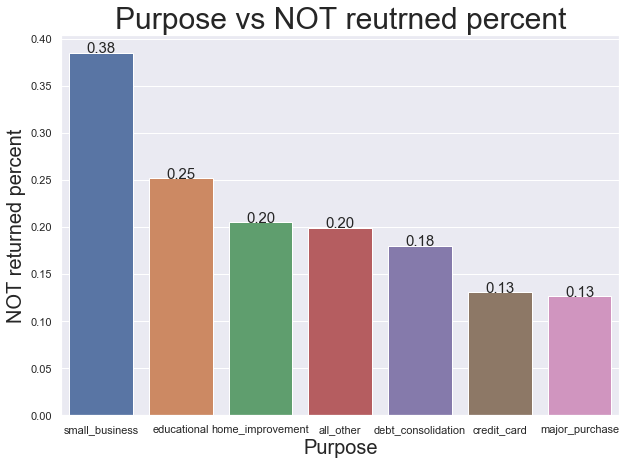

In [14]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = ls[0], y = ls[1], data=ls)

ax.set_xlabel('Purpose', size=20)
ax.set_ylabel('NOT returned percent',size=20)
ax.set_title('Purpose vs NOT reutrned percent', size=30, loc='center')

labels(ax)

* 'small_business' has the highest non return percentage and 'major_purchases' has the lowest.

** Trend between FICO score and interest rate.**

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


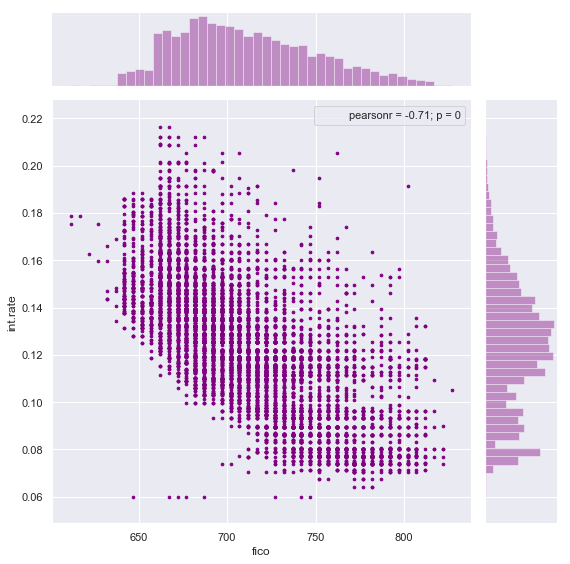

In [15]:
a = sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color='purple', s=7, height=8)
a.annotate(stats.pearsonr)

* As FICO score increases, loan interest rate decreases.

** Is the trend differed between not.fully.paid and credit.policy?**

In [16]:
import matplotlib

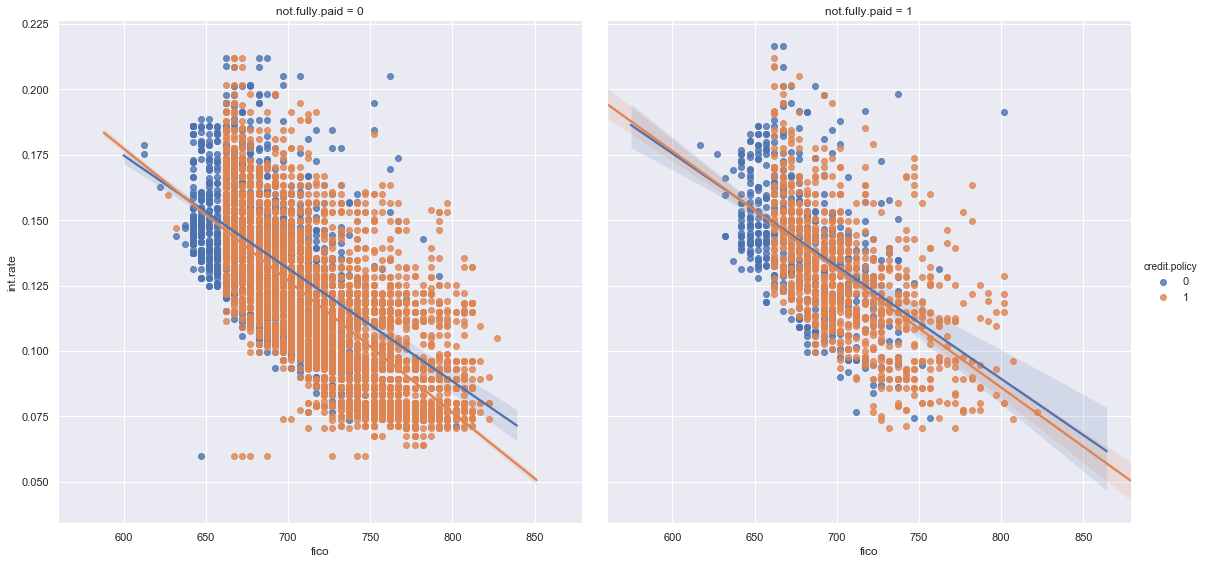

In [17]:
a = sns.lmplot(x = 'fico', y = 'int.rate', data = loans, hue = 'credit.policy', col = 'not.fully.paid', height=8)

* The behaviour is relatively the same. Regardless of the credit policy and wheter the loan was fully paid. 

** Violin plot showing the distribution of interest rate over not fully paid vs paid.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Interest Rate vs Not.Fully.Paid')

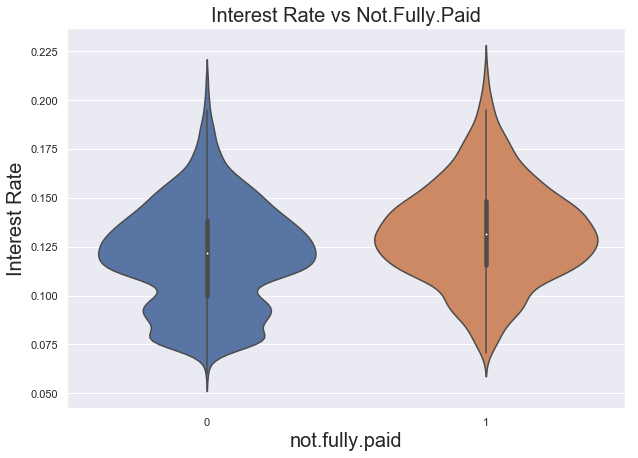

In [39]:
ax = sns.violinplot(x='not.fully.paid', y='int.rate', data = loans, aspect = '10/1')
sns.set(rc={'figure.figsize':(10,7)})

plt.xlabel('not.fully.paid', size = 20)
plt.ylabel('Interest Rate', size = 20)
plt.title('Interest Rate vs Not.Fully.Paid', size = 20)

# Machine Learning 

** Comparing the results from single decision tree model vs random forest

## Categorical Features

** Introducing dummy variables to a categorical column **purpose** 

In [19]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [20]:
cat_feats = ['purpose']

In [21]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Trying to predict the 'not.fully.paid' column

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training a Single Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of a Single Decision Tree model

In [28]:
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2424
           1       0.18      0.21      0.20       450

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [31]:
print(confusion_matrix(y_test, predictions))

[[2004  420]
 [ 356   94]]


## Training a Random Forest model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=600)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation of a Random Forest model

In [35]:
predictions = rfc.predict(X_test)

**Classification report from the results**

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2424
           1       0.29      0.01      0.03       450

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.57      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



**The Confusion Matrix for the predictions.**

In [37]:
print(confusion_matrix(y_test, predictions))

[[2409   15]
 [ 444    6]]


**What performed better the random forest or the decision tree?**

In [38]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.